# Chapter 4: Training Models

Link to notes... https://www.notion.so/O-Reilly-Hands-On-ML-Book-Curriculum-d6952ef1dd914ed19553a6235d0ee948

## Linear Regression

In [1]:
# Let's generate some linear looking data
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [2]:
# Now let us compute theta-hat using the Normal Equation
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.65416392],
       [2.89329538]])

In [4]:
# Now we can make predictions using the same
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.65416392],
       [10.44075468]])

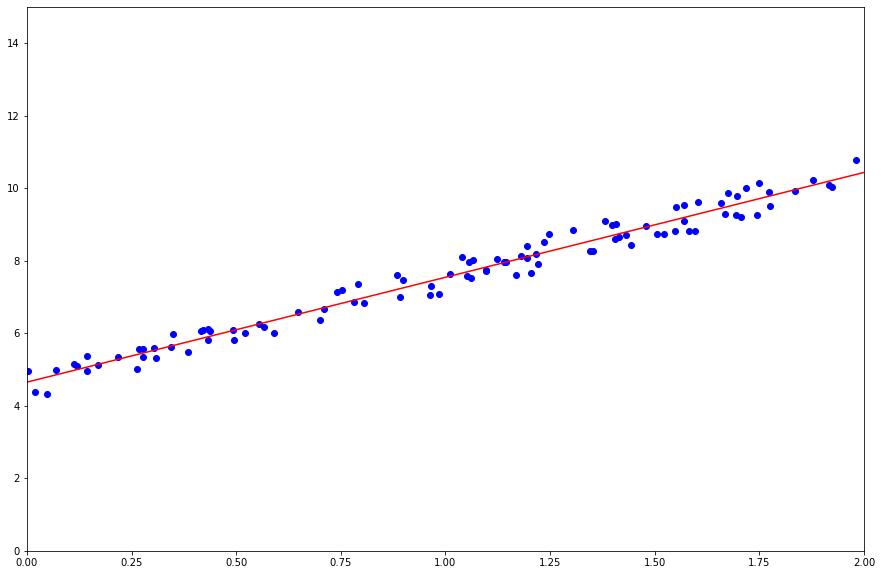

In [5]:
# Let's Plot the model predicitons
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(X_new, y_predict, "r-")
plt.scatter(X, y, c="b")
plt.axis([0, 2, 0, 15])
plt.show();

In [6]:
# Performing Linear Regression using Scikit-Learn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.intercept_, lr.coef_

(array([4.65416392]), array([[2.89329538]]))

In [7]:
lr.predict(X_new)

array([[ 4.65416392],
       [10.44075468]])

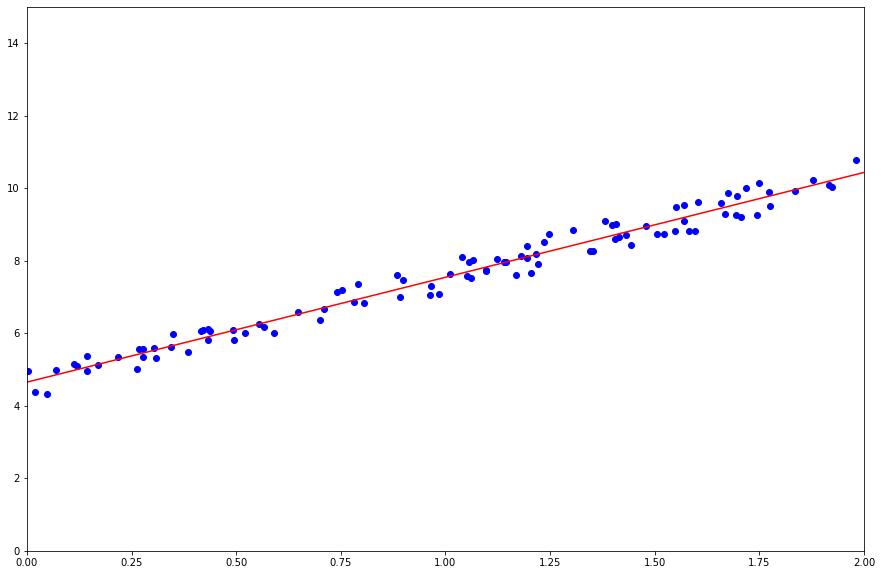

In [8]:
# Plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(X_new, lr.predict(X_new), "r-")
plt.scatter(X, y, c="b")
plt.axis([0, 2, 0, 15])
plt.show();

In [9]:
# It is the same equation as above done manually.

## Polynomial Regression

What if your data is more complex than a straight line? Suprisingly, oyu can use a linear model to fit non-linear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called *Polynomial Regression*.

Let's look at an example. First, let's generate some nonlinear data, based on a simple *quadratic* equation (plus some noise):

In [10]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = .5 * X**2 + X + 2 + np.random.randn(m, 1)

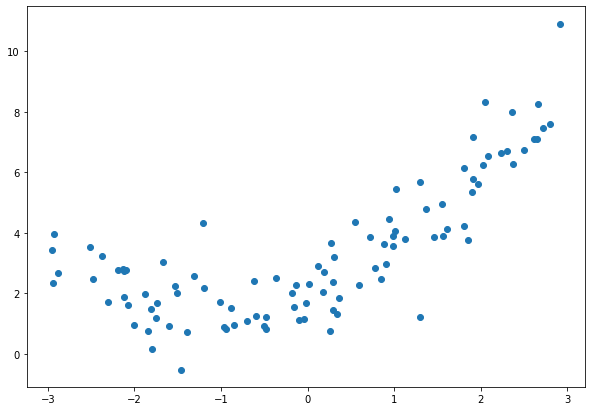

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
plt.show();

Clearly, a straight lines wil never fit this data properly. So let's use Scikit-Learn's `PolynomialFeatures` class to transform our training data, adding the square (second-degree polynomial) of each feature  in the training set as a new feature (in this case there is just one feature).

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.23360834]), array([2.23360834, 4.98900624]))

`X_poly` now contains the original feature of `X` plus the square of this feature. Now you can fit a `LinearRegression` model to this extended training data.

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00169867]), array([[0.99058948, 0.48034428]]))

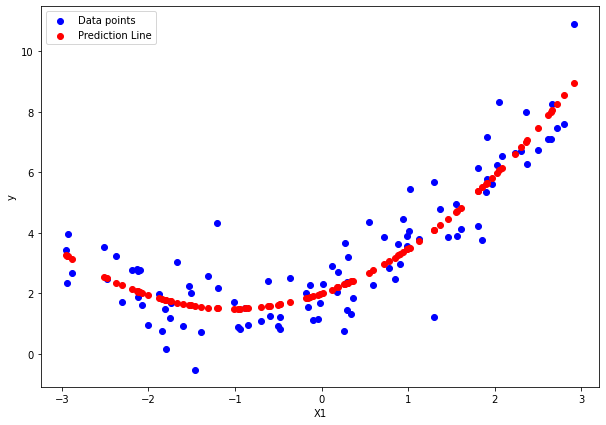

In [14]:
labels = ["Data points", "Prediction Line"]
plt.figure(figsize=(10, 7))
plt.scatter(X, y, c="blue")
plt.scatter(X, lin_reg.coef_[0][1]*(X**2) + lin_reg.coef_[0][0]*X + lin_reg.intercept_, c="red")
plt.xlabel("X1")
plt.ylabel("y")
plt.legend(labels);